Er zijn voor deze opdracht 'geen' libraries gebruikt. Alle gebruikte methoden zijn zelf uitgewerkt. De enige gebruikte libraries:

- CSV voor het verwerken van data uit CSV bestand
- matplotlib voor het plotten van de grafieken
- sum, len en sorted

Voor de betrouwbaarheidsintervallen heb ik 95% van de data gekozen, waar een kritische waarde van 1,96 bij hoort volgens Z tabel.

Ik heb per functie de wiskundige formule uitgewerkt in latex. Korte uitleg sum $\sum$:<br>
$\displaystyle\sum _{i=1}^{n}\left({l_{i}}\right)$<br>
$l_{i}$ : iteratie i (index) over l<br>
$i = 1$ : index start punt voor iteratie<br>
$n$ : index eindpunt iteratie<br>
$\sum$ : som van alle getallen in iteratie

In [604]:
from csv import *
import matplotlib.pyplot as plt

In [605]:
# loads data from excel into dictionary with structure {columnname = [data], columnname = [data], etc.}
def get_data(file):
    final, data = {}, []
    for i, row in enumerate(file):
        if 'JJ00' in str(row):
            continue
        for j, col in enumerate(row):
            if i == 0:
                data.append([])
                final[col] = j
            else:
                if is_float(col): # convert float values into floats
                    data[j].append(float(col))
                elif is_int(col):
                    data[j].append(int(col)) # convert integer values into integers
                else: 
                    data[j].append(col) # else append string value
                    
    for i in final: # attach each column name to its corresponding datalist
        final[i] = data[final[i]]
    return final


# checks if n is convertible to integer
def is_int(n):
    try:
        int(n)
        return True
    except:
        return False
    

# checks if n is convertible to float
def is_float(n):
    if '.' in n: # all decimals are separated by '.' in floats excel file 
        return True
    return False

__Wiskundige formules met definities:__<br>
- l is de set van waardes
- n is het aantal waardes in l (len(l))<br>

__Mean / gemiddelde:__<br>
Gemiddelde wordt berekend door de som van alle waardes in l door n te delen.<br>

$\displaystyle{\frac {1}{n}}\sum _{i=1}^{n}l_{i}$<br><br>
1 delen door n * som is hetzelfde als som / n.<br>
Ofwel:<br>

${\frac {l_{1}+l_{2}+\cdots +l_{n}}{n}}$<br>

In [606]:
# calculate mean
def mean(l):
    return sum(l) / len(l)

__Median / mediaan:__<br>
Als eerst worden de waardes in l gesorteerd van laag (l) naar hoog (r).<br><br>
Als n oneven is:<br>
index $\left(\dfrac{n+1}{2}\right)$ van l<br>  
Als n even is:<br>
$\frac{\left(\left(index\, \dfrac{n}{2} van\, l\right)+\left(index\, \dfrac{n+1}{2} van\, l\right)\right)}{2}$

In [607]:
# calculate median 
def median(l):
    n = len(l)
    l = sorted(l) # using sorted to sort values in list ascending
    i = (n - 1) // 2 # index
    
    if n % 2 == 0: # if length sorted list is even, return mean of middle two
        return (l[i] + l[i + 1]) / 2
    else: # else return middle value from sorted list
        return l[i]

__Mode / modus:__<br>
De modus is de waarde die het meest voorkomt in l.

In [608]:
# calculate mode    
def mode(l):
    counted = {} # empty dict for counted values
    
    for i in l: # put all values in counted
        
        if not i in counted:
            counted[i] = 1 # if not exist add with count 1
        else:
            counted[i] += 1 # if already exist count + 1
    
    cv = list(counted.values()) # add all values from counted to list
    highest_occurence = max(cv) # get occurence of most occuring value(s) by getting highest counted value
    
    # return most occuring value(s) in datatype list, by looking up the keys with value highest_occurence
    return sorted([i for i in counted if counted[i] == highest_occurence])

__Standaard deviation / standaardafwijking:__<br>

$\displaystyle\sqrt{\dfrac{1}{n}\sum _{i=1}^{n}\left({l_{i}-\mu}\right)^{2}}$<br>

$\mu$ : gemiddelde van l<br>
$l_{i}$ : iteratie i over l<br>
$i = 1$ : start punt voor iteratie<br>

1 delen door n * som is hetzelfde als som / n.<br>
Voor elke waarde in l:<br>
>$(waarde - gemiddelde\, van\, l)^2$<br>

Standaardafwijking / $\sigma$ = $\sqrt{gemiddelde\, van\, l}$

In [609]:
# calculate standard deviation
def std(l):
    mean_l = mean(l) # first get average of list
    squares = [(i - mean_l) ** 2 for i in l] # append square of every (i in original l) - mean of l
    return mean(squares) ** 0.5 # square root of mean is standard deviation | ** 0.5 == square root 

__Regression Line / trendlijn:__<br><br>
n = lengte xs en ys (lengte moet gelijk zijn)<br>

Om de trendlijn te maken berekenen we eerst 2 dingen:
- slope:<br>
$\dfrac{n\left(\sum _{i=1}^{n}{xs_{i} \cdot ys_{i}}\right) - \left(\left(\sum _{i=1}^{n}{xs_{i}}\right)
\cdot\left(\sum _{i=1}^{n}{ys_{i}}\right)\right)}
{n\left(\sum _{i=1}^{n}{xs_{i} \cdot xs_{i}}\right) - \left(\sum _{i=1}^{n}{{xs_{i}}}\right)^{2}}$<br><br>

- y-intercept (start):<br>
$\dfrac{\left(\sum _{i=1}^{n}{ys_{i}}\right) - slope\left(\sum _{i=1}^{n}{xs_{i}}\right)}{n}$<br>

De algemene formule om y van een lijn te berekenen is $y = mx + b$<br>
Voor elke waarde in xs:<br>
>$y_{n} = (slope * waarde) + y\,intercept$

In [610]:
# list multiplication product
def list_product(l1, l2): # list comrehension for list multiplication
    return [l1[i] * l2[i] for i, x in enumerate(l1)] # return list with multiplicated values


# calculate slope and y intercept and calulate trendline
def trendline(xs, ys):
    a = len(xs) * sum(list_product(xs, ys)) # length of xs multiplied with sum of xs*ys (list_product)
    b = sum(xs) * sum(ys) # sum of xs multiplied with sum of ys
    c = len(xs) * sum(list_product(xs, xs)) # length of xs multiplied with sum of xs*xs (list_product)
    d = sum(xs) ** 2 # square sum of xs
    
    m = (a - b) / (c - d) # calculate slope
    b = (sum(ys) - m * sum(xs)) / len(xs) # calculate y intercept (starting point)
    
    return [m * x + b for x in xs] # y = mx + b for calculation y points equation line 

In [611]:
def confidence_interval(column):
    nv = len(column) # number of values in column
    mn = mean(column) # mean of values in column
    sd = std(column) # standard deviation of values in column
    
    cw = 1.96 # critic value according to Z table for 95% of data
    err = (sd / (nv ** 0.5)) * cw # error marge
    
    lower =  mn - err # lower bound
    upper =  mn + err # upper bound
    
    # return mean (mid), lower and upper values
    return "95% van de data valt tussen " + str(lower) + " en " + str(upper)

__Openen bestand en opslaan data:__

In [612]:
file = reader(open("utrecht.csv"), delimiter=';') # open csv file
data = get_data(file) # get data from csv into dictionary with get_data function

__Printen en plotten:__ <br>

In [613]:
# Bevolkingsgroei_11, LevendGeborenKinderen_2, Immigratie_6
start, end = -50, -1 # limit/range for plotting data, going two years back
x = list(range(len(data['Perioden'][start:end]))) # x axes with months as integers for calculations
xr = data['Perioden'][start:end] # x axes with real months for plotting

# columns from excel file
immigratie = data['Immigratie_6'][start:end]
bevolkingsgroei = data['Bevolkingsgroei_11'][start:end]
levendgeborenkinderen = data['LevendGeborenKinderen_2'][start:end]
overledenen = data['Overledenen_3'][start:end]
bevolking = data['BevolkingAanHetEindeVanDePeriode_15'][start:end]
bevolkingsgroeirelatief = data['BevolkingsgroeiRelatief_12'][start:end]
emigratie = data['EmigratieInclusiefAdmCorrecties_9'][start:end]

In [614]:
# print calculations for 3 columns
print("\nImmigratie berekeningen:")
print("Gemiddelde: ",mean(immigratie))
print("Mediaan: ", median(immigratie))
print("Modus: ", mode(immigratie))
print("Standaard deviatie: ", std(immigratie))
print("Betrouwbaarheidsinterval:",confidence_interval(immigratie))
print("\nBevolkingsgroei relatief berekeningen:")
print("Gemiddelde: ",mean(bevolkingsgroeirelatief))
print("Mediaan: ", median(bevolkingsgroeirelatief))
print("Modus: ", mode(bevolkingsgroeirelatief))
print("Standaard deviatie: ", std(bevolkingsgroeirelatief))
print("Betrouwbaarheidsinterval:",confidence_interval(bevolkingsgroeirelatief))
print("\nEmigratie berekeningen:")
print("Gemiddelde: ",mean(emigratie))
print("Mediaan: ", median(emigratie))
print("Modus: ", mode(emigratie))
print("Standaard deviatie: ", std(emigratie))
print("Betrouwbaarheidsinterval:",confidence_interval(emigratie))


Immigratie berekeningen:
Gemiddelde:  546.0408163265306
Mediaan:  392
Modus:  [290, 350, 354, 384, 421, 905]
Standaard deviatie:  342.6923389140091
Betrouwbaarheidsinterval: 95% van de data valt tussen 450.0869614306081 en 641.9946712224531

Bevolkingsgroei relatief berekeningen:
Gemiddelde:  0.11122448979591834
Mediaan:  0.07
Modus:  [0.04]
Standaard deviatie:  0.144852249185601
Betrouwbaarheidsinterval: 95% van de data valt tussen 0.07066586002395006 en 0.15178311956788662

Emigratie berekeningen:
Gemiddelde:  401.1020408163265
Mediaan:  365
Modus:  [256, 294, 357, 379]
Standaard deviatie:  118.44868774489704
Betrouwbaarheidsinterval: 95% van de data valt tussen 367.93640824775537 en 434.26767338489765



Hier zien we hoe bevolkingsgroei gelijk op gaat met immigratie, en niet zozeer met geboortecijfers:



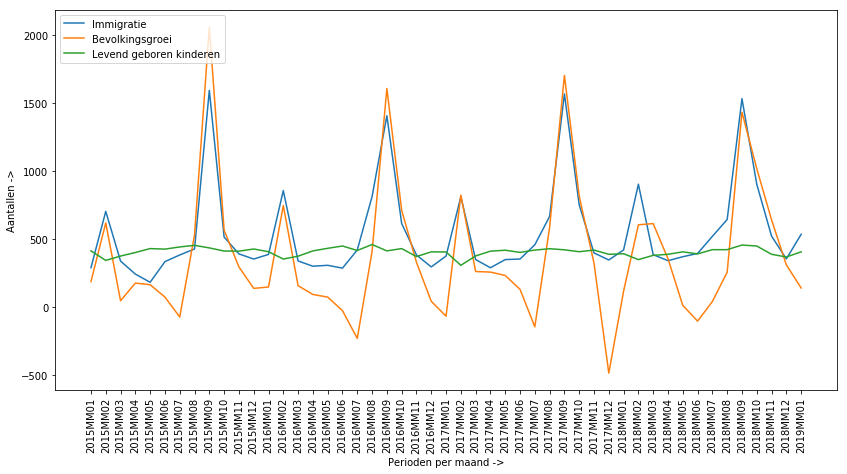

In [615]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14,7] # set size of graphs

# plot certain combinations of data
plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, immigratie, label='Immigratie')
plt.plot(xr, bevolkingsgroei, label='Bevolkingsgroei')
plt.plot(xr, levendgeborenkinderen, label='Levend geboren kinderen')
plt.legend(loc='upper left')
print("\nHier zien we hoe bevolkingsgroei gelijk op gaat met immigratie, en niet zozeer met geboortecijfers:\n")
plt.show()


Hier zien we immigratie tegenover emigratie:


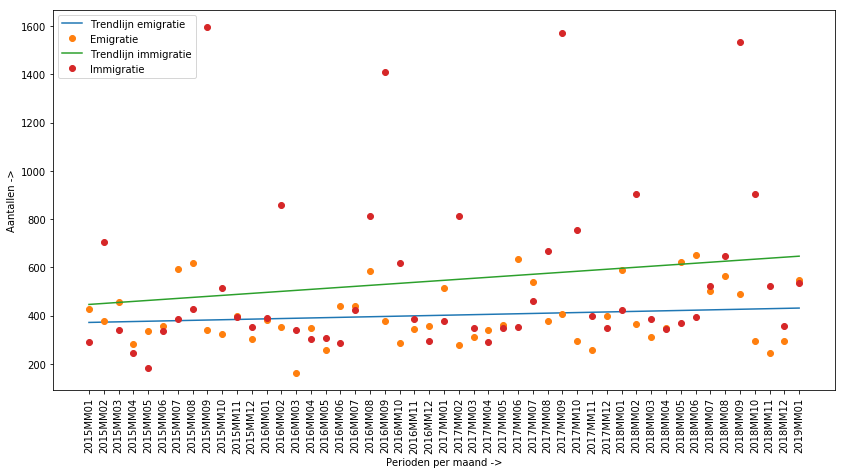

In [616]:
plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, trendline(x, emigratie), label='Trendlijn emigratie')
plt.plot(xr, emigratie,'o', label='Emigratie')
plt.plot(xr, trendline(x, immigratie), label='Trendlijn immigratie')
plt.plot(xr, immigratie,'o', label='Immigratie')
plt.legend(loc='upper left')
print("\nHier zien we immigratie tegenover emigratie:")
plt.show()


Hier zien we hoe de bevolking toeneemt incl. trendlijn:


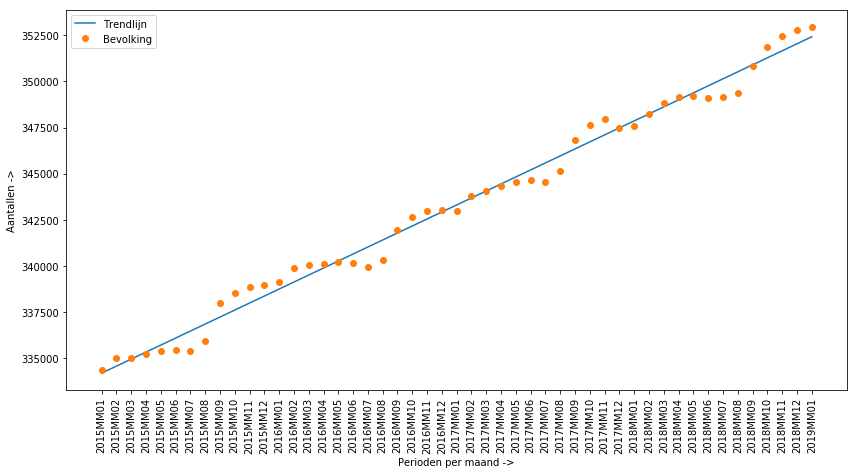

In [617]:
plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, trendline(x, bevolking), label='Trendlijn')
plt.plot(xr, bevolking,'o', label='Bevolking')
plt.legend(loc='upper left')
print("\nHier zien we hoe de bevolking toeneemt incl. trendlijn:")
plt.show()


Hier zien we bevolkingsgroei relatief incl. trendlijn:


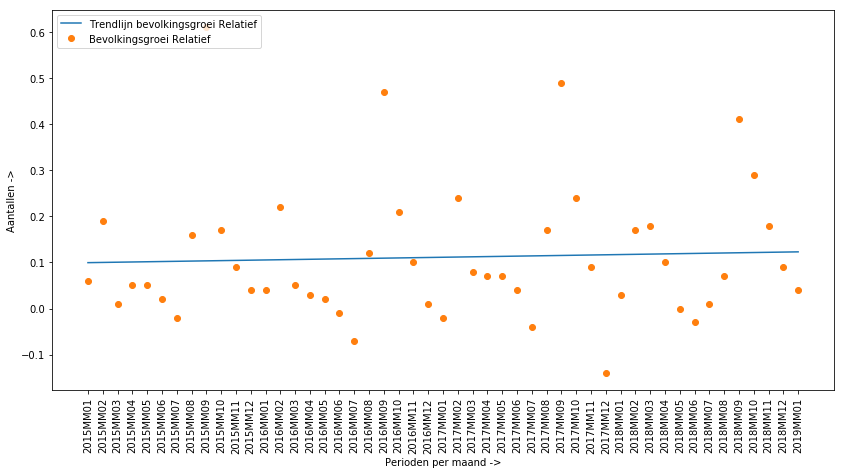

In [618]:
plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, trendline(x, bevolkingsgroeirelatief), label='Trendlijn bevolkingsgroei Relatief')
plt.plot(xr, bevolkingsgroeirelatief,'o', label='Bevolkingsgroei Relatief')
plt.legend(loc='upper left')
print("\nHier zien we bevolkingsgroei relatief incl. trendlijn:")
plt.show()


Hier zien we overledenen incl. trendlijn:


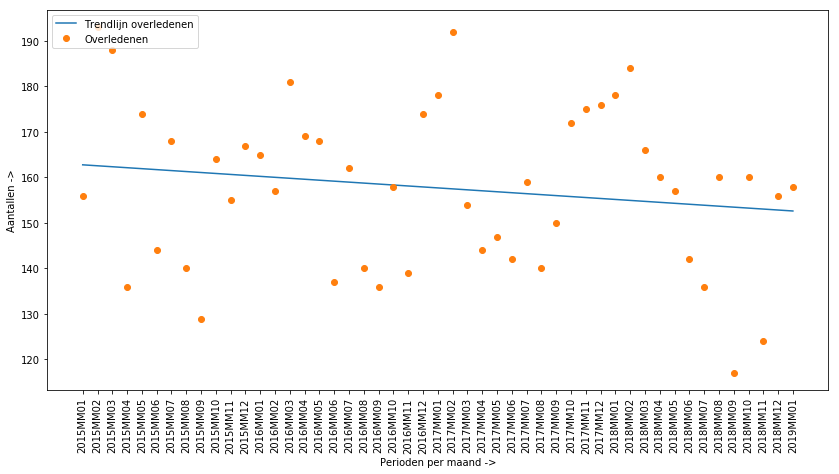

In [619]:
plt.xlabel('Perioden per maand ->')
plt.ylabel('Aantallen ->')
plt.xticks(rotation=90)
plt.plot(xr, trendline(x, overledenen), label='Trendlijn overledenen')
plt.plot(xr, overledenen,'o', label='Overledenen')
plt.legend(loc='upper left')
print("\nHier zien we overledenen incl. trendlijn:")
plt.show()